In [1]:
import ROOT 
ROOT.gInterpreter.AddIncludePath(("/Users/shahinashahina/Documents/PostDoc_work/dragon_analyzer/src"))
ROOT.gSystem.Load("/Users/shahinashahina/Documents/PostDoc_work/dragon_analyzer/lib/libDragon.so")

Welcome to JupyROOT 6.26/06


-1

In [2]:
import uproot
import matplotlib.pyplot as plt
import numpy as np 

In [3]:
from ROOT import TFile, TTree, TH1F, TCanvas

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


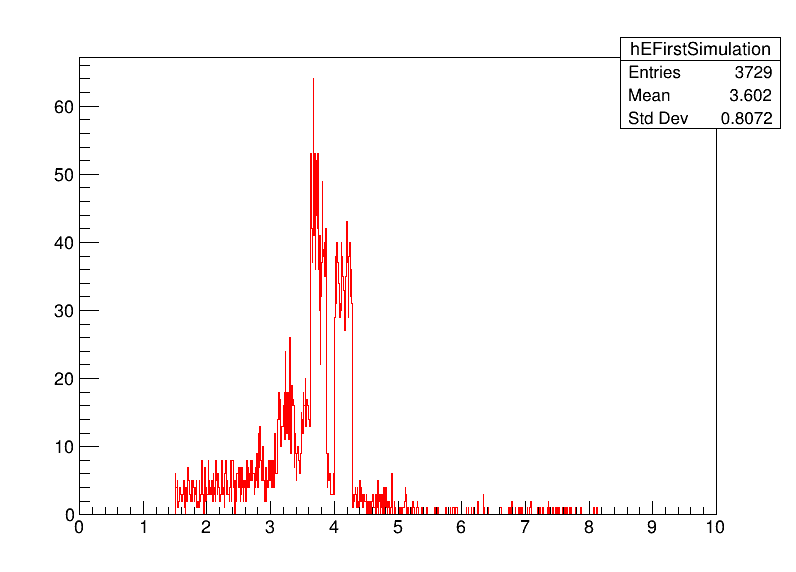

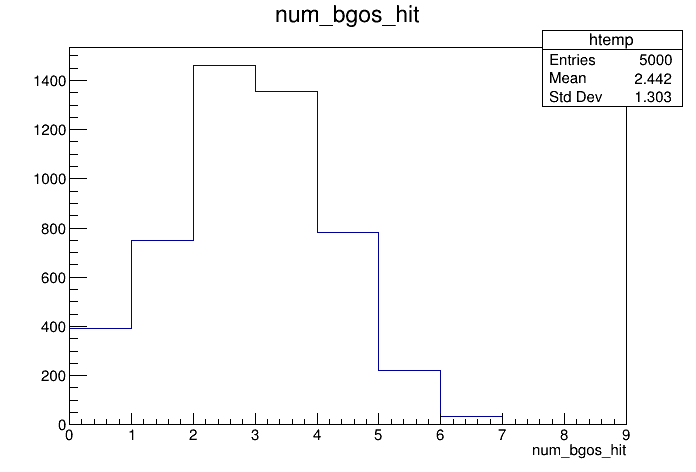

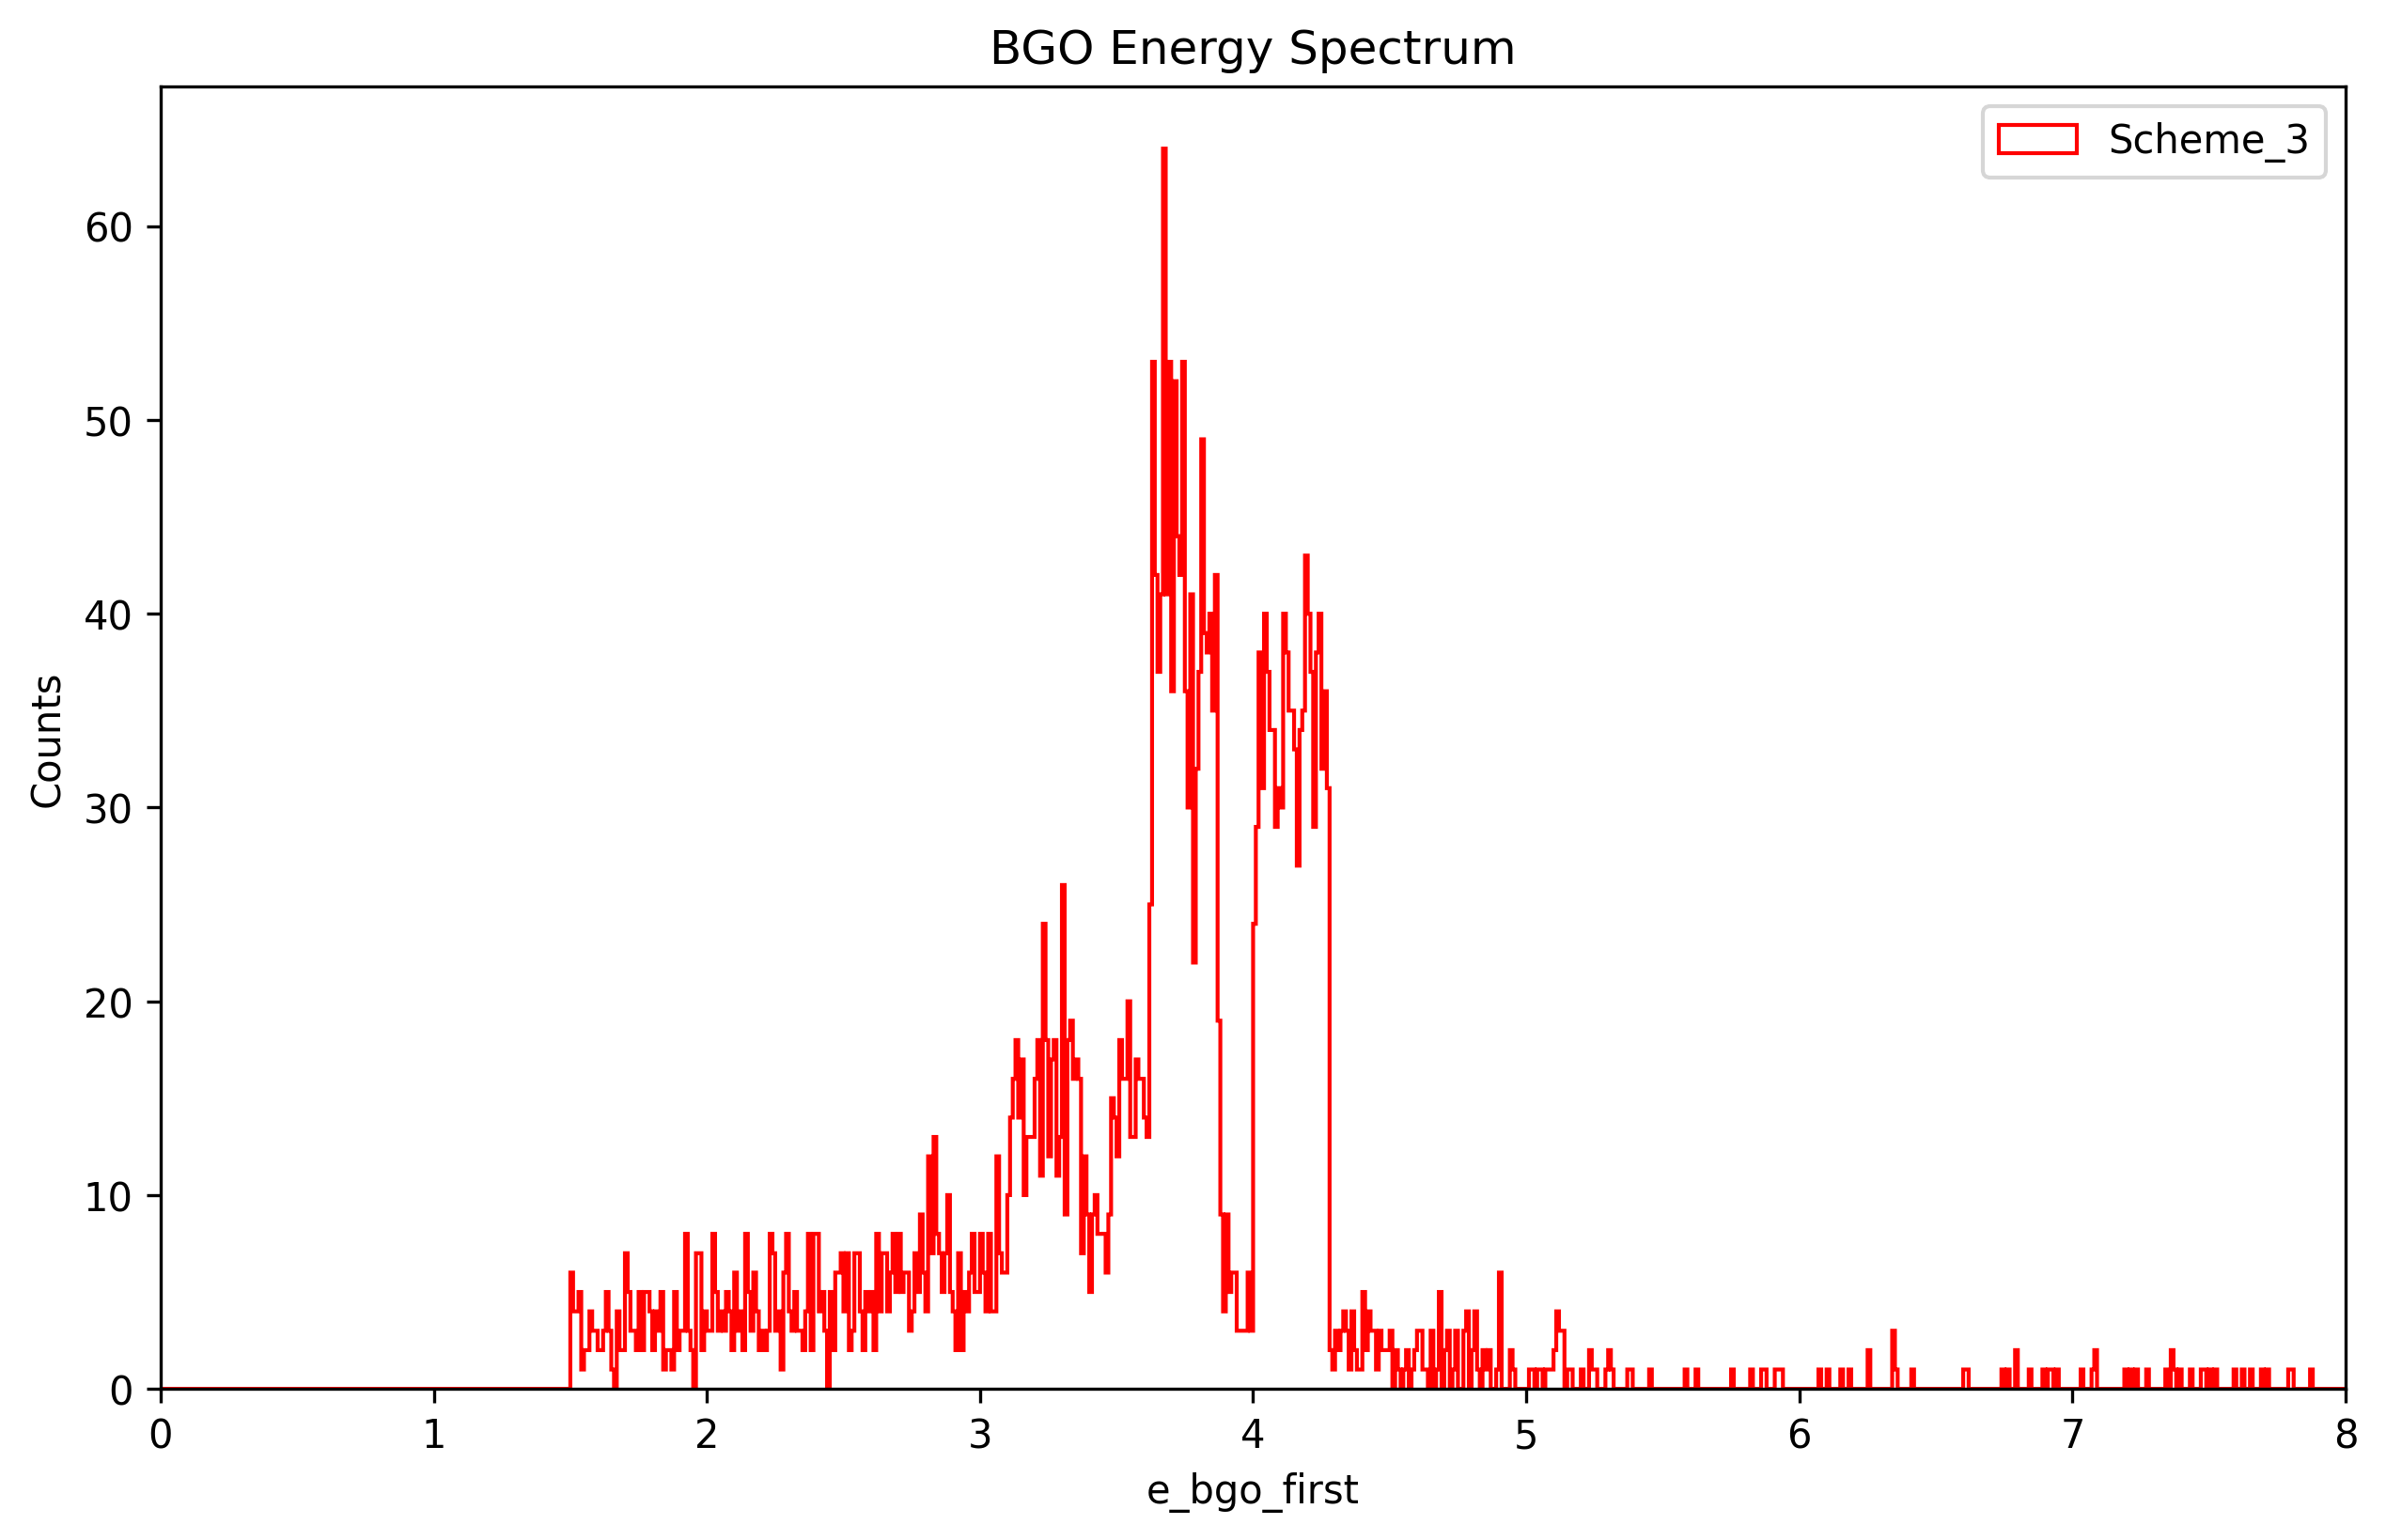

In [4]:
root_file = TFile.Open("Geant3_simulation/k39pg_606_Oct17_3.root")
# Get the tree named "h1001" from the file
h1001 = root_file.Get("h1001")

# Create a histogram named "hEFirstSimulation" with 1000 bins ranging from 0 to 10
hEFirstSimulation = TH1F("hEFirstSimulation", "", 1000, 0, 10)

# Draw "e_bgo_first" from the tree into the histogram, applying a cut "e_bgo_first > 1.5"
h1001.Draw("e_bgo_first>>hEFirstSimulation", "e_bgo_first > 1.5", "same")

# Set the line color of the histogram
hEFirstSimulation.SetLineColor(2)

# Create a canvas for plotting
c1 = TCanvas("c1", "", 800, 600)

# Draw the histogram
hEFirstSimulation.Draw()
c1.Draw()
# Set the x-axis range
#hEFirstSimulation.GetXaxis().SetRangeUser(0, 11)

c2 = TCanvas();
#h1001.Draw("e_bgo_second:e_bgo_first>>h2D(20,0,10,20,0,10)","e_bgo_first > 1.5 && e_bgo_second>1.5","col")
h1001.Draw("num_bgos_hit","","")
c2.Draw()

# Extract the "e_bgo_first" branch values into a NumPy array, applying the cut "e_bgo_first > 1.5"
e_bgo_first_values = []
for event in h1001:
    if event.e_bgo_first > 1.5:  # Applying the cut
        e_bgo_first_values.append(event.e_bgo_first)


e_bgo_first_values = np.array(e_bgo_first_values)


plt.figure(figsize=(10, 6),dpi=300)
plt.hist(e_bgo_first_values, bins=1000, range=(0, 10), color='red', histtype='step', label='Scheme_3')
plt.xlim(0, 8)
plt.xlabel('e_bgo_first')
plt.ylabel('Counts')
plt.title('BGO Energy Spectrum')
plt.legend()


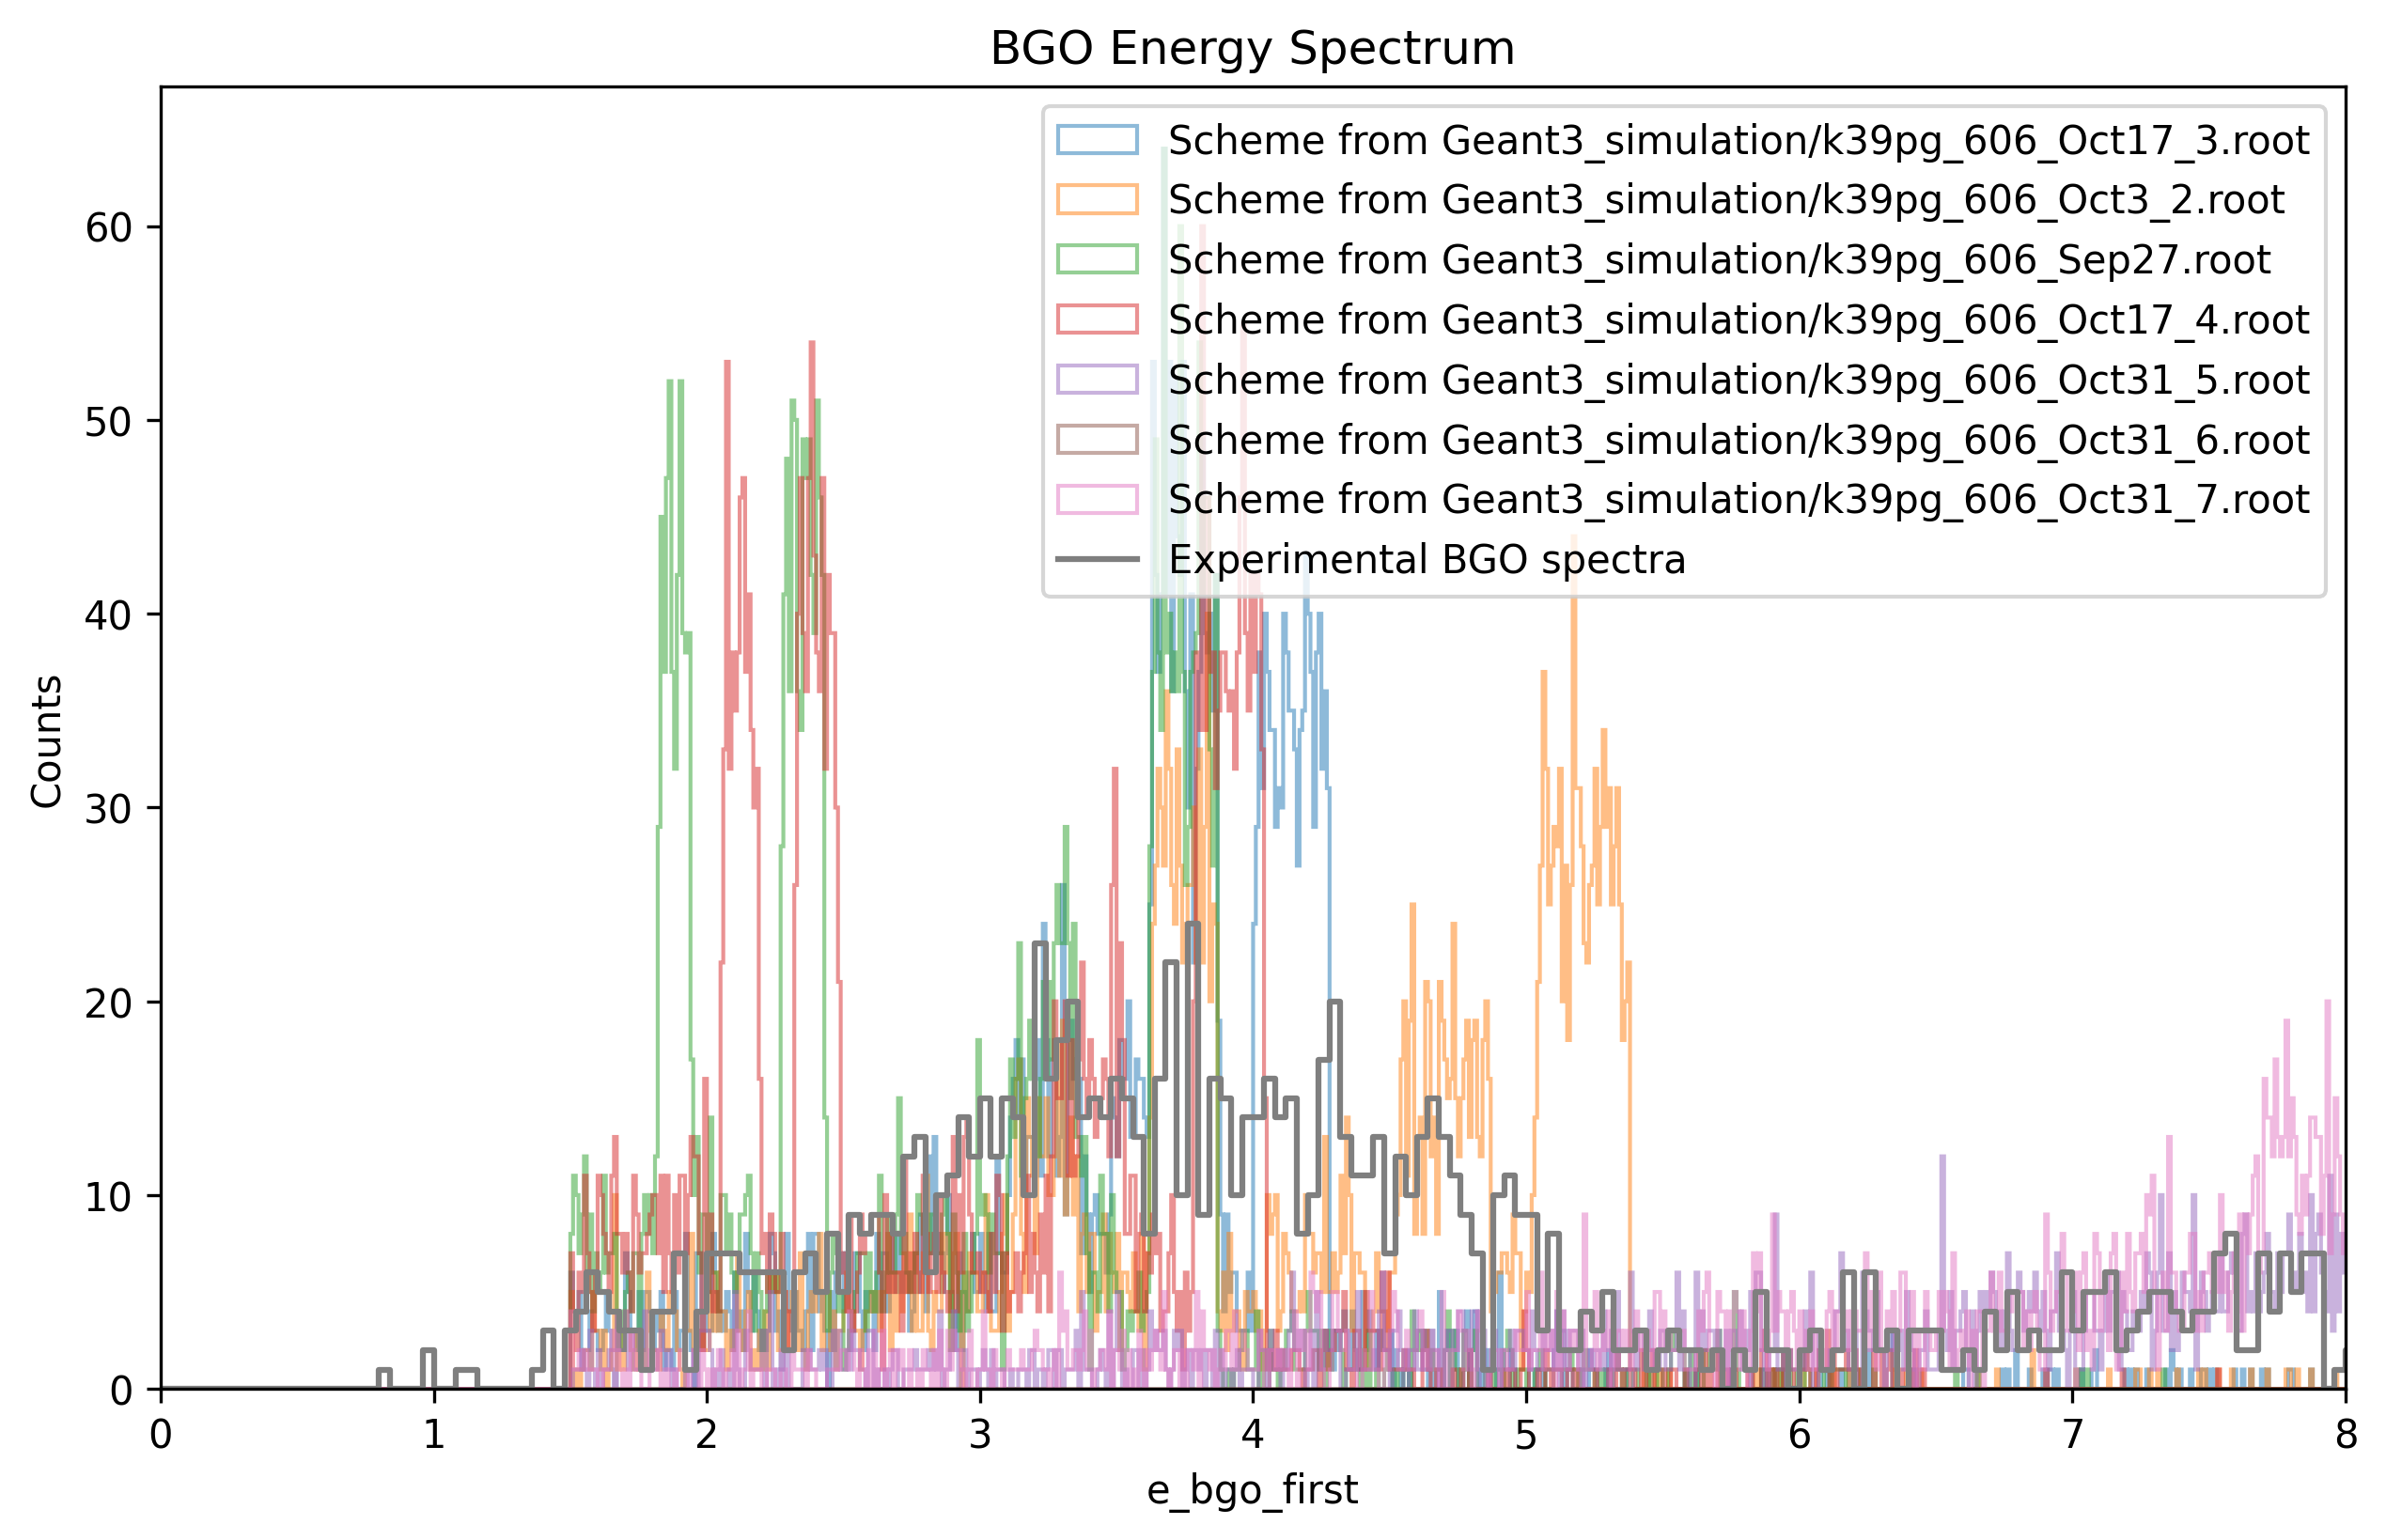

In [5]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt

# List of ROOT files to process
root_files = [
    "Geant3_simulation/k39pg_606_Oct17_3.root",
    "Geant3_simulation/k39pg_606_Oct3_2.root",
    "Geant3_simulation/k39pg_606_Sep27.root",
    "Geant3_simulation/k39pg_606_Oct17_4.root",
    "Geant3_simulation/k39pg_606_Oct31_5.root",
    "Geant3_simulation/k39pg_606_Oct31_6.root",
    "Geant3_simulation/k39pg_606_Oct31_7.root"
]

# Dictionary to store extracted data for each file
data_dict = {}

# Loop over each file
for root_file_path in root_files:
    # Open the ROOT file
    root_file = ROOT.TFile.Open(root_file_path)

    # Get the tree named "h1001" from the file
    h1001 = root_file.Get("h1001")

    # Extract the "e_bgo_first" branch values into a NumPy array, applying the cut "e_bgo_first > 1.5"
    e_bgo_first_values = []
    for event in h1001:
        if event.e_bgo_first > 1.5:  # Applying the cut
            e_bgo_first_values.append(event.e_bgo_first)

    # Convert to NumPy array
    e_bgo_first_values = np.array(e_bgo_first_values)

    # Store data in a dictionary for later plotting
    data_dict[root_file_path] = e_bgo_first_values

# Plot all histograms on top of each other
plt.figure(figsize=(10, 6), dpi=300)



for i, (root_file_path, e_bgo_first_values) in enumerate(data_dict.items()):
    plt.hist(
        e_bgo_first_values, 
        bins=1000, 
        range=(0, 10), #
        histtype='step',alpha=0.5, 
        label=f'Scheme from {root_file_path}'
    )

# Set plot limits and labels
plt.xlim(0, 8)
plt.xlabel('e_bgo_first')
plt.ylabel('Counts')
plt.title('BGO Energy Spectrum')


bgo_spectra_exp = ROOT.TFile("hBgoSpectra.root")
hBgo_hist =  bgo_spectra_exp.Get("hBgoGate")
n_bins = hBgo_hist.GetNbinsX()
x_edges = np.array([hBgo_hist.GetBinLowEdge(i) for i in range(1, n_bins + 2)])
y_values = np.array([hBgo_hist.GetBinContent(i) for i in range(1, n_bins + 1)])



plt.step(x_edges[:-1], y_values,label="Experimental BGO spectra")
# Add legend to differentiate between files
plt.legend()
plt.savefig("possible_cascades.png",dpi=300)
# Show the overlaid plot
plt.show()


In [6]:
n_bins

500

In [7]:
bgo_spectra_exp = ROOT.TFile("hBgoSpectra.root")

In [8]:
bgo_spectra_exp.ls()

TFile**		hBgoSpectra.root	
 TFile*		hBgoSpectra.root	
  KEY: TH1F	hBgo;1	
  KEY: TH1F	hBgoGate;1	head.bgo.ecal[head.bgo.hit0] {((!(tail.io32.trigger_latch & 128) && !(xtofh==-1))&&(tail.dsssd.efront>0.0 && tail.dsssd.efront<4000.))&&(xtofh>2140.000000 && xtofh<2260.000000)}
  KEY: TH1F	hBgoGate2;1	head.bgo.esort[0] {((!(tail.io32.trigger_latch & 128) && !(xtofh==-1))&&(tail.dsssd.efront>0.0 && tail.dsssd.efront<4000.))&&(xtofh>2140.000000 && xtofh<2260.000000)}
  KEY: TH1F	hBgoGate3;1	head.bgo.esort[1] {((!(tail.io32.trigger_latch & 128) && !(xtofh==-1))&&(tail.dsssd.efront>0.0 && tail.dsssd.efront<4000.))&&(xtofh>2140.000000 && xtofh<2260.000000)}
  KEY: TH1F	hBGOSim_Sc1;1	
  KEY: TH1F	hBGOSim_Sc2;1	
  KEY: TH1F	hBGOSim_Sc3;1	
  KEY: TH1F	hBGOSim_Sc4;1	
  KEY: TH1F	hBGOSim_Sc5;1	
  KEY: TH1F	hBGOSim_Sc6;1	
  KEY: TH1F	hBGOSim_Sc7;1	
  KEY: TH1F	hBGOSim_Sc8;1	
  KEY: TH1F	hBGOSim_Sc9;1	
  KEY: TH1F	hBGOSim_Sc10;1	


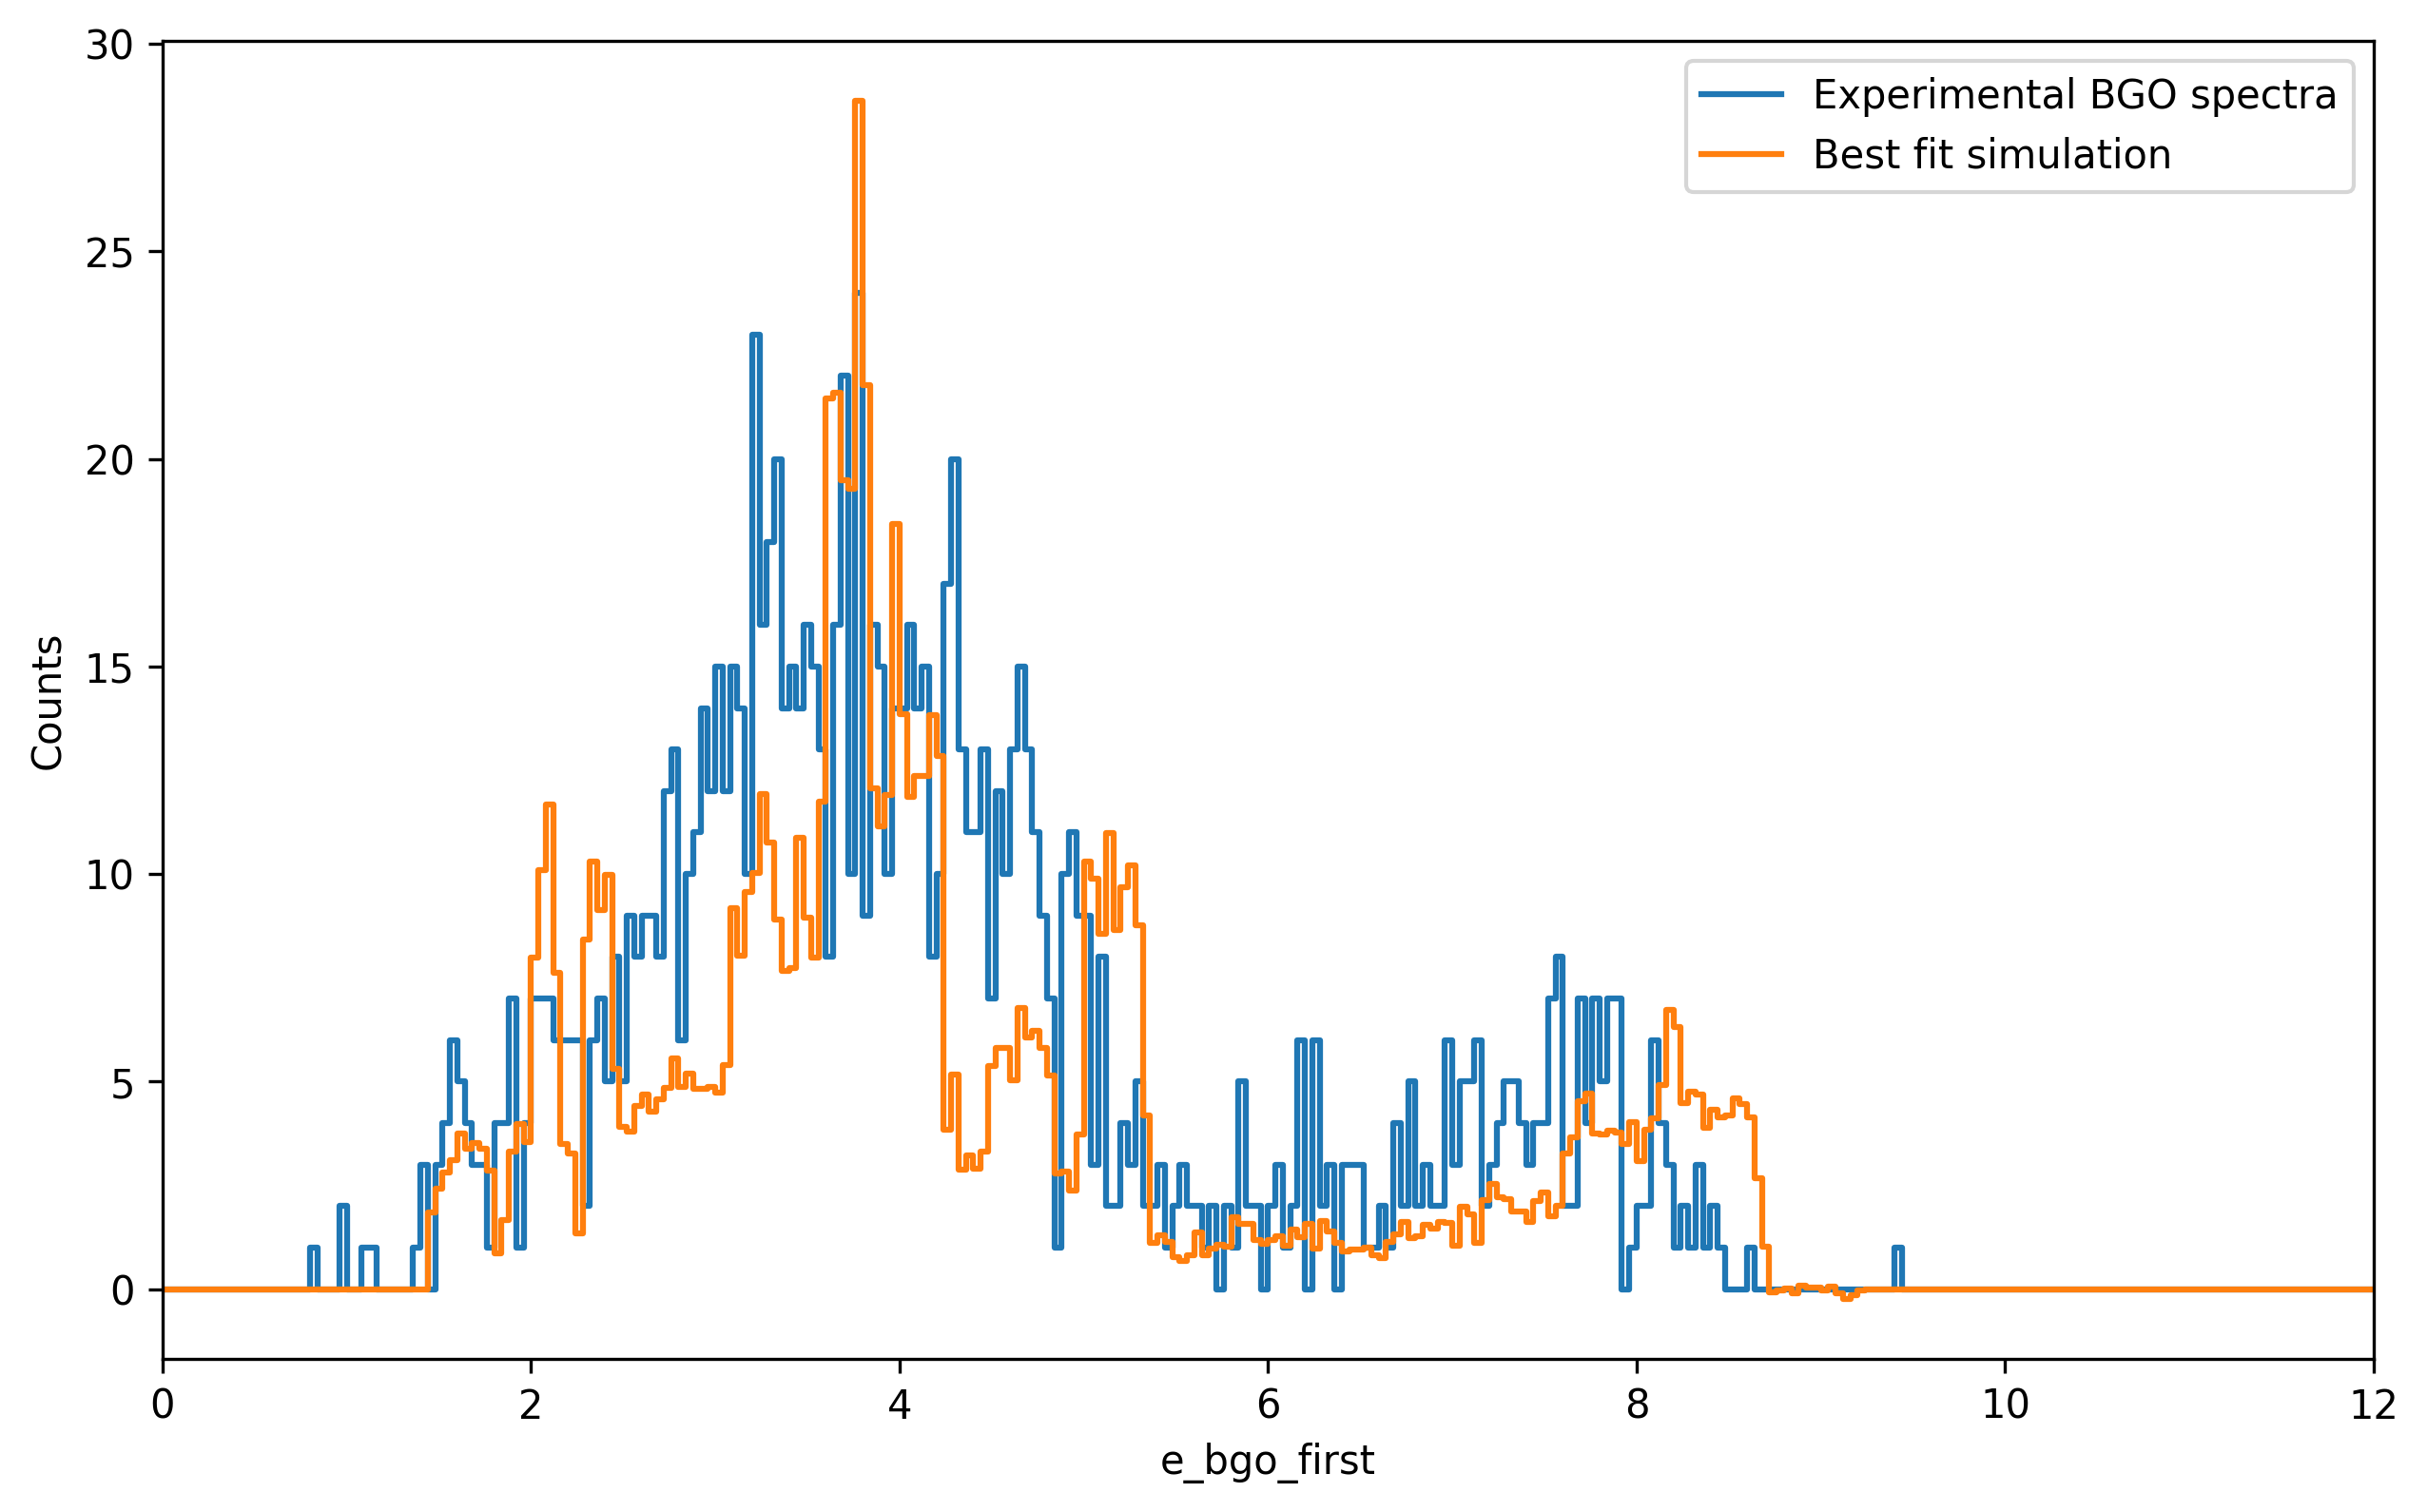

Best-fit coefficients for each simulation:
Geant3_simulation/k39pg_606_Oct17_3.root: 0.0707887337637159
Geant3_simulation/k39pg_606_Oct3_2.root: 0.0771373996394683
Geant3_simulation/k39pg_606_Sep27.root: -0.013826443354837141
Geant3_simulation/k39pg_606_Oct17_4.root: 0.05444433791261106
Geant3_simulation/k39pg_606_Oct31_5.root: -0.0052941772426443115
Geant3_simulation/k39pg_606_Oct31_6.root: 1.0
Geant3_simulation/k39pg_606_Oct31_7.root: 0.08264723086553419


In [9]:
from scipy.optimize import minimize

exp_spectrum = y_values

# Normalize the simulation histograms and align them with the experimental binning
sim_spectra = []
for root_file_path, e_bgo_first_values in data_dict.items():
    sim_hist, _ = np.histogram(e_bgo_first_values, bins=n_bins, range=(x_edges[0], x_edges[-1]))
    sim_spectra.append(sim_hist)

# Stack simulations into a matrix for linear combination fitting
sim_spectra = np.stack(sim_spectra)

# Objective function: Sum of squared residuals
def objective_function(coeffs, exp_spectrum, sim_spectra):
    combined_spectrum = np.dot(coeffs, sim_spectra)
    return np.sum((exp_spectrum - combined_spectrum) ** 2)

# Initial guess for the coefficients (equal weights)
initial_guess = np.ones(len(sim_spectra))

# Minimize the objective function to find the best coefficients
result = minimize(objective_function, initial_guess, args=(exp_spectrum, sim_spectra))

# Extract the best-fit coefficients
best_fit_coeffs = result.x

# Calculate the best-fit linear combination
best_fit_spectrum = np.dot(best_fit_coeffs, sim_spectra)


plt.figure(figsize=(10, 6), dpi=300)
plt.step(x_edges[:-1], exp_spectrum, label="Experimental BGO spectra")
plt.step(x_edges[:-1], best_fit_spectrum, label="Best fit simulation")
plt.xlabel('e_bgo_first')
plt.ylabel('Counts')
#plt.title('Best Fit of Experimental BGO Spectrum')
plt.legend()
plt.savefig("BGO_spectrum.png",dpi=300)
plt.xlim(0,12)
plt.show()


print("Best-fit coefficients for each simulation:")
for i, root_file_path in enumerate(data_dict.keys()):
    print(f"{root_file_path}: {best_fit_coeffs[i]}")

In [10]:
bgo_spectra_exp = ROOT.TFile("hBgoSpectra.root")
hBgo_hist =  bgo_spectra_exp.Get("hBgo")

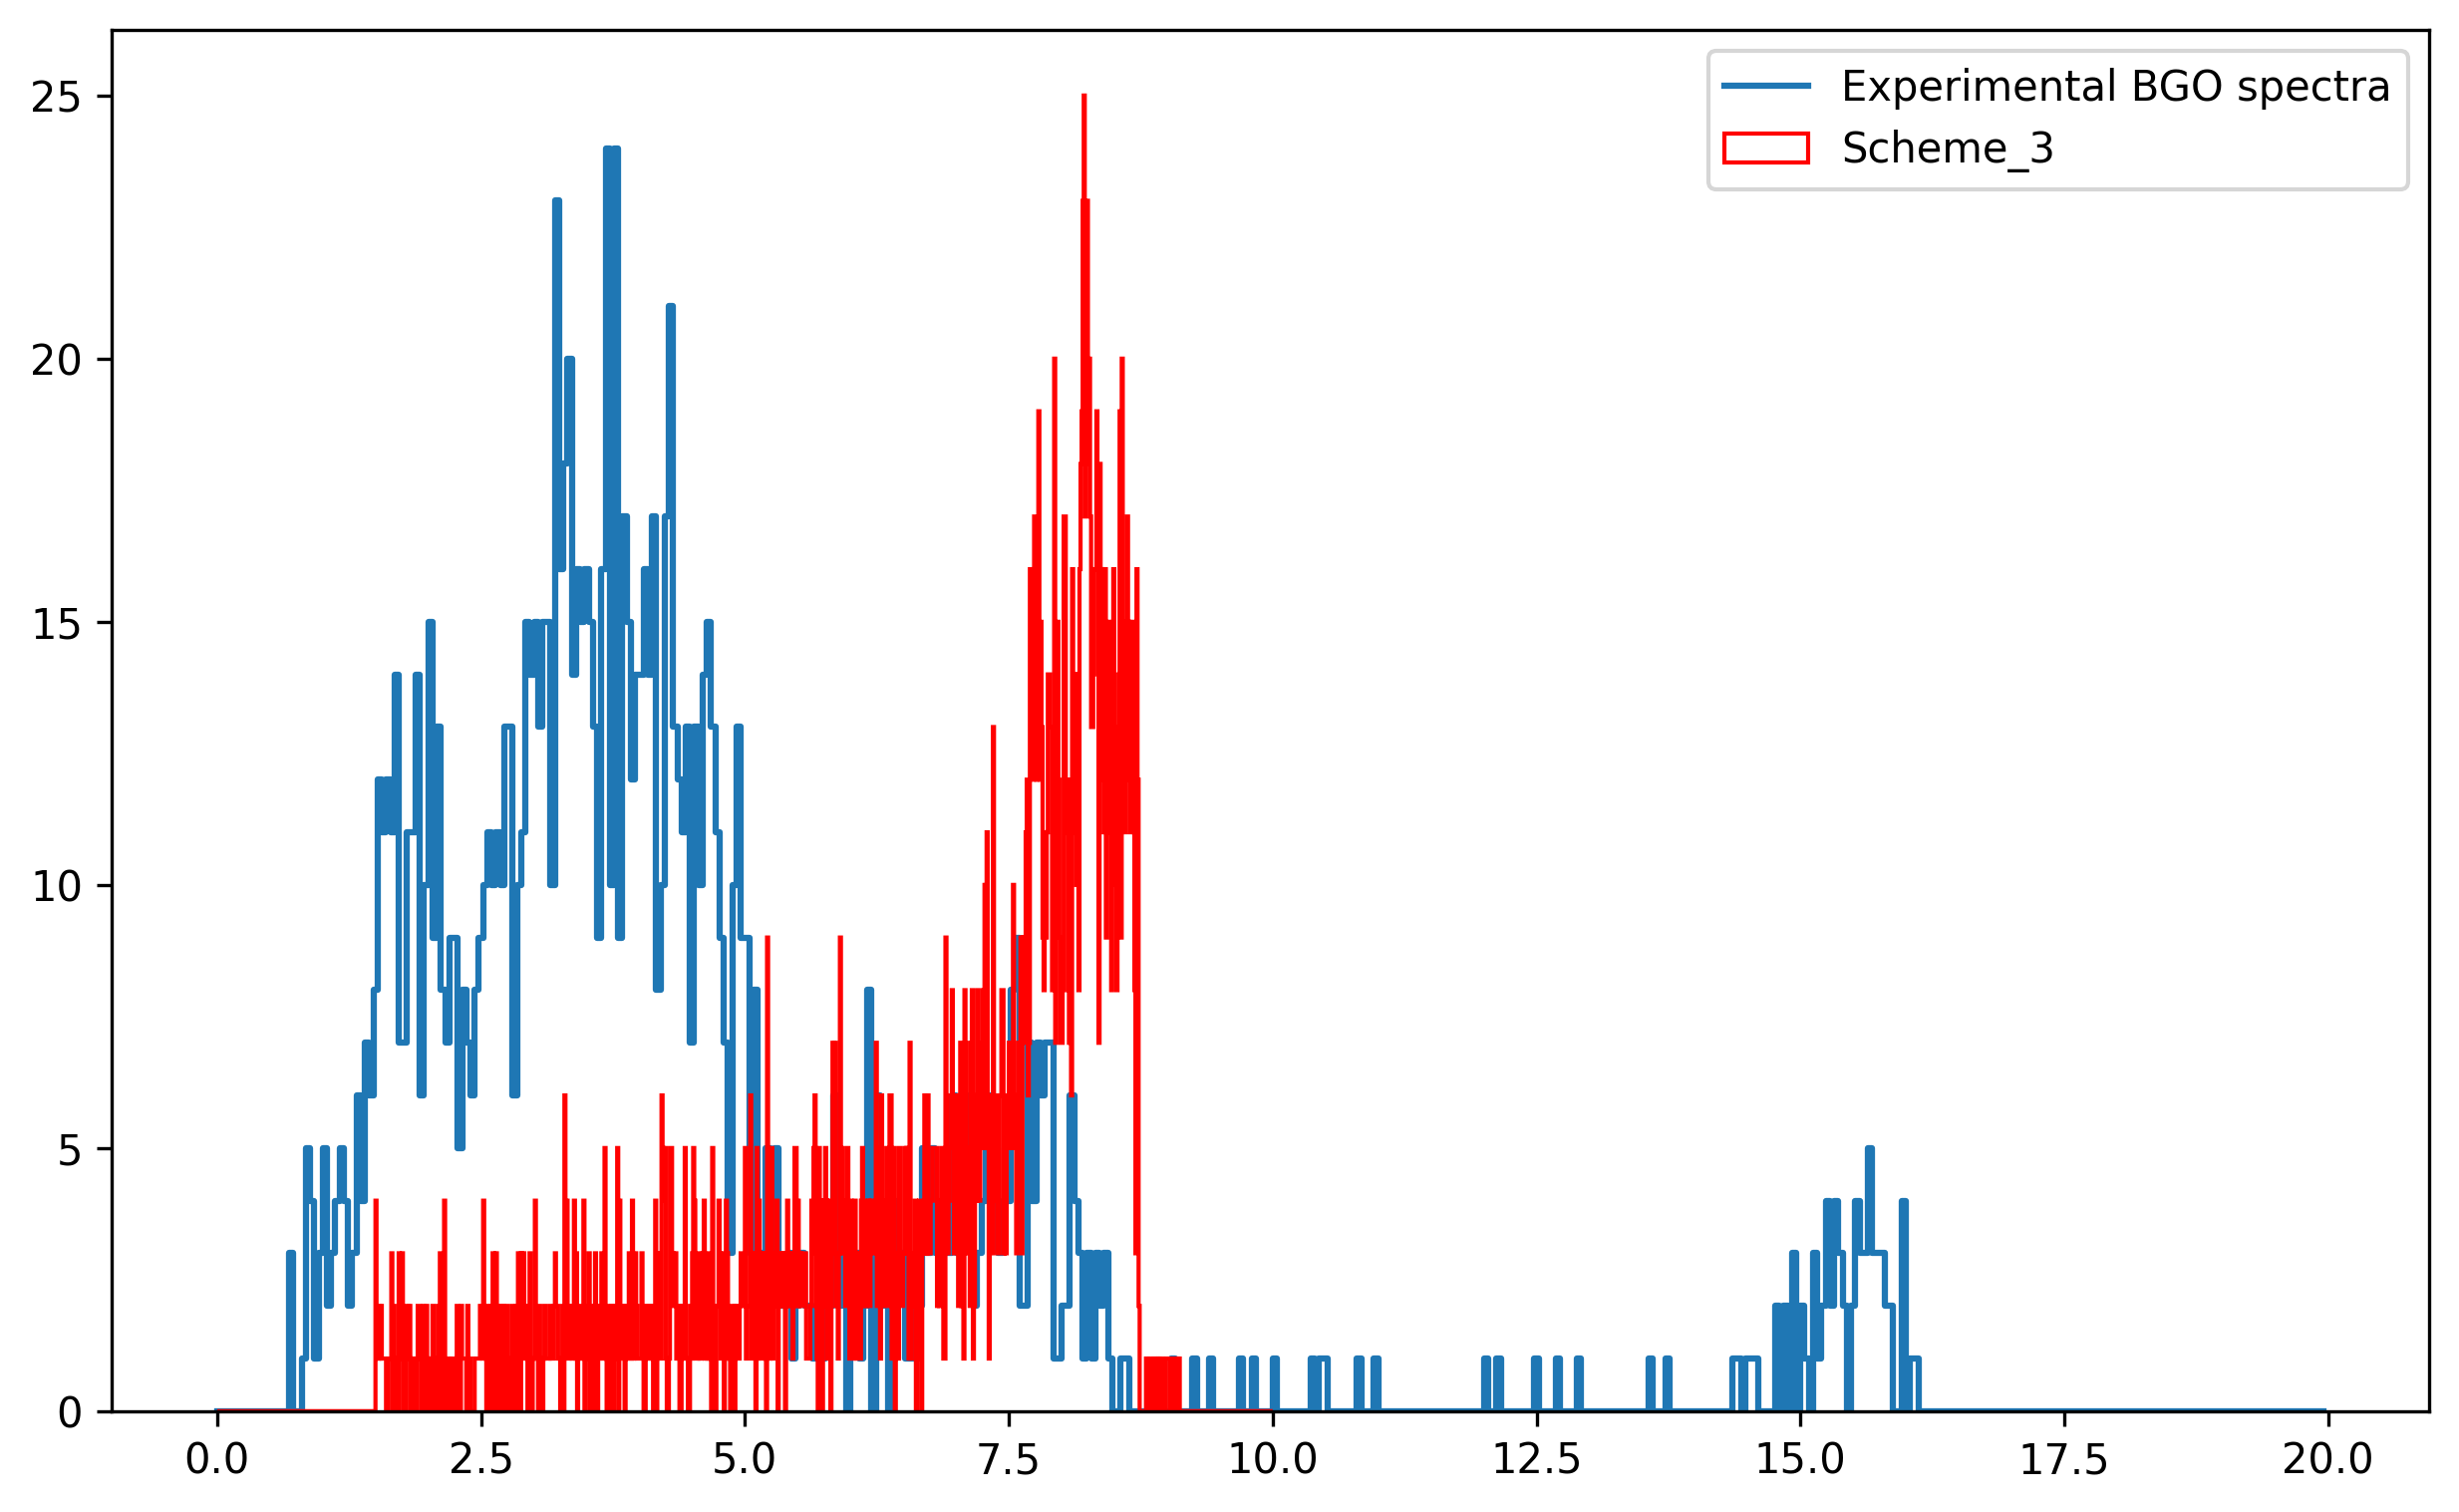

In [11]:
n_bins = hBgo_hist.GetNbinsX()
x_edges = np.array([hBgo_hist.GetBinLowEdge(i) for i in range(1, n_bins + 2)])
y_values = np.array([hBgo_hist.GetBinContent(i) for i in range(1, n_bins + 1)])

# Create the step plot using Matplotlib
plt.figure(figsize=(10, 6),dpi=300)

plt.step(x_edges[:-1], y_values,label="Experimental BGO spectra")
plt.hist(e_bgo_first_values, bins=1000, range=(0, 10), color='red', histtype='step', label='Scheme_3')
plt.legend()

In [12]:
bgo_spectra_exp.ls()

TFile**		hBgoSpectra.root	
 TFile*		hBgoSpectra.root	
  OBJ: TH1F	hBgo	 : 0 at: 0x15c8abbd0
  KEY: TH1F	hBgo;1	
  KEY: TH1F	hBgoGate;1	head.bgo.ecal[head.bgo.hit0] {((!(tail.io32.trigger_latch & 128) && !(xtofh==-1))&&(tail.dsssd.efront>0.0 && tail.dsssd.efront<4000.))&&(xtofh>2140.000000 && xtofh<2260.000000)}
  KEY: TH1F	hBgoGate2;1	head.bgo.esort[0] {((!(tail.io32.trigger_latch & 128) && !(xtofh==-1))&&(tail.dsssd.efront>0.0 && tail.dsssd.efront<4000.))&&(xtofh>2140.000000 && xtofh<2260.000000)}
  KEY: TH1F	hBgoGate3;1	head.bgo.esort[1] {((!(tail.io32.trigger_latch & 128) && !(xtofh==-1))&&(tail.dsssd.efront>0.0 && tail.dsssd.efront<4000.))&&(xtofh>2140.000000 && xtofh<2260.000000)}
  KEY: TH1F	hBGOSim_Sc1;1	
  KEY: TH1F	hBGOSim_Sc2;1	
  KEY: TH1F	hBGOSim_Sc3;1	
  KEY: TH1F	hBGOSim_Sc4;1	
  KEY: TH1F	hBGOSim_Sc5;1	
  KEY: TH1F	hBGOSim_Sc6;1	
  KEY: TH1F	hBGOSim_Sc7;1	
  KEY: TH1F	hBGOSim_Sc8;1	
  KEY: TH1F	hBGOSim_Sc9;1	
  KEY: TH1F	hBGOSim_Sc10;1	


In [13]:
pwd

'/Users/shahinashahina/Documents/PostDoc_work/S1805_analysis'

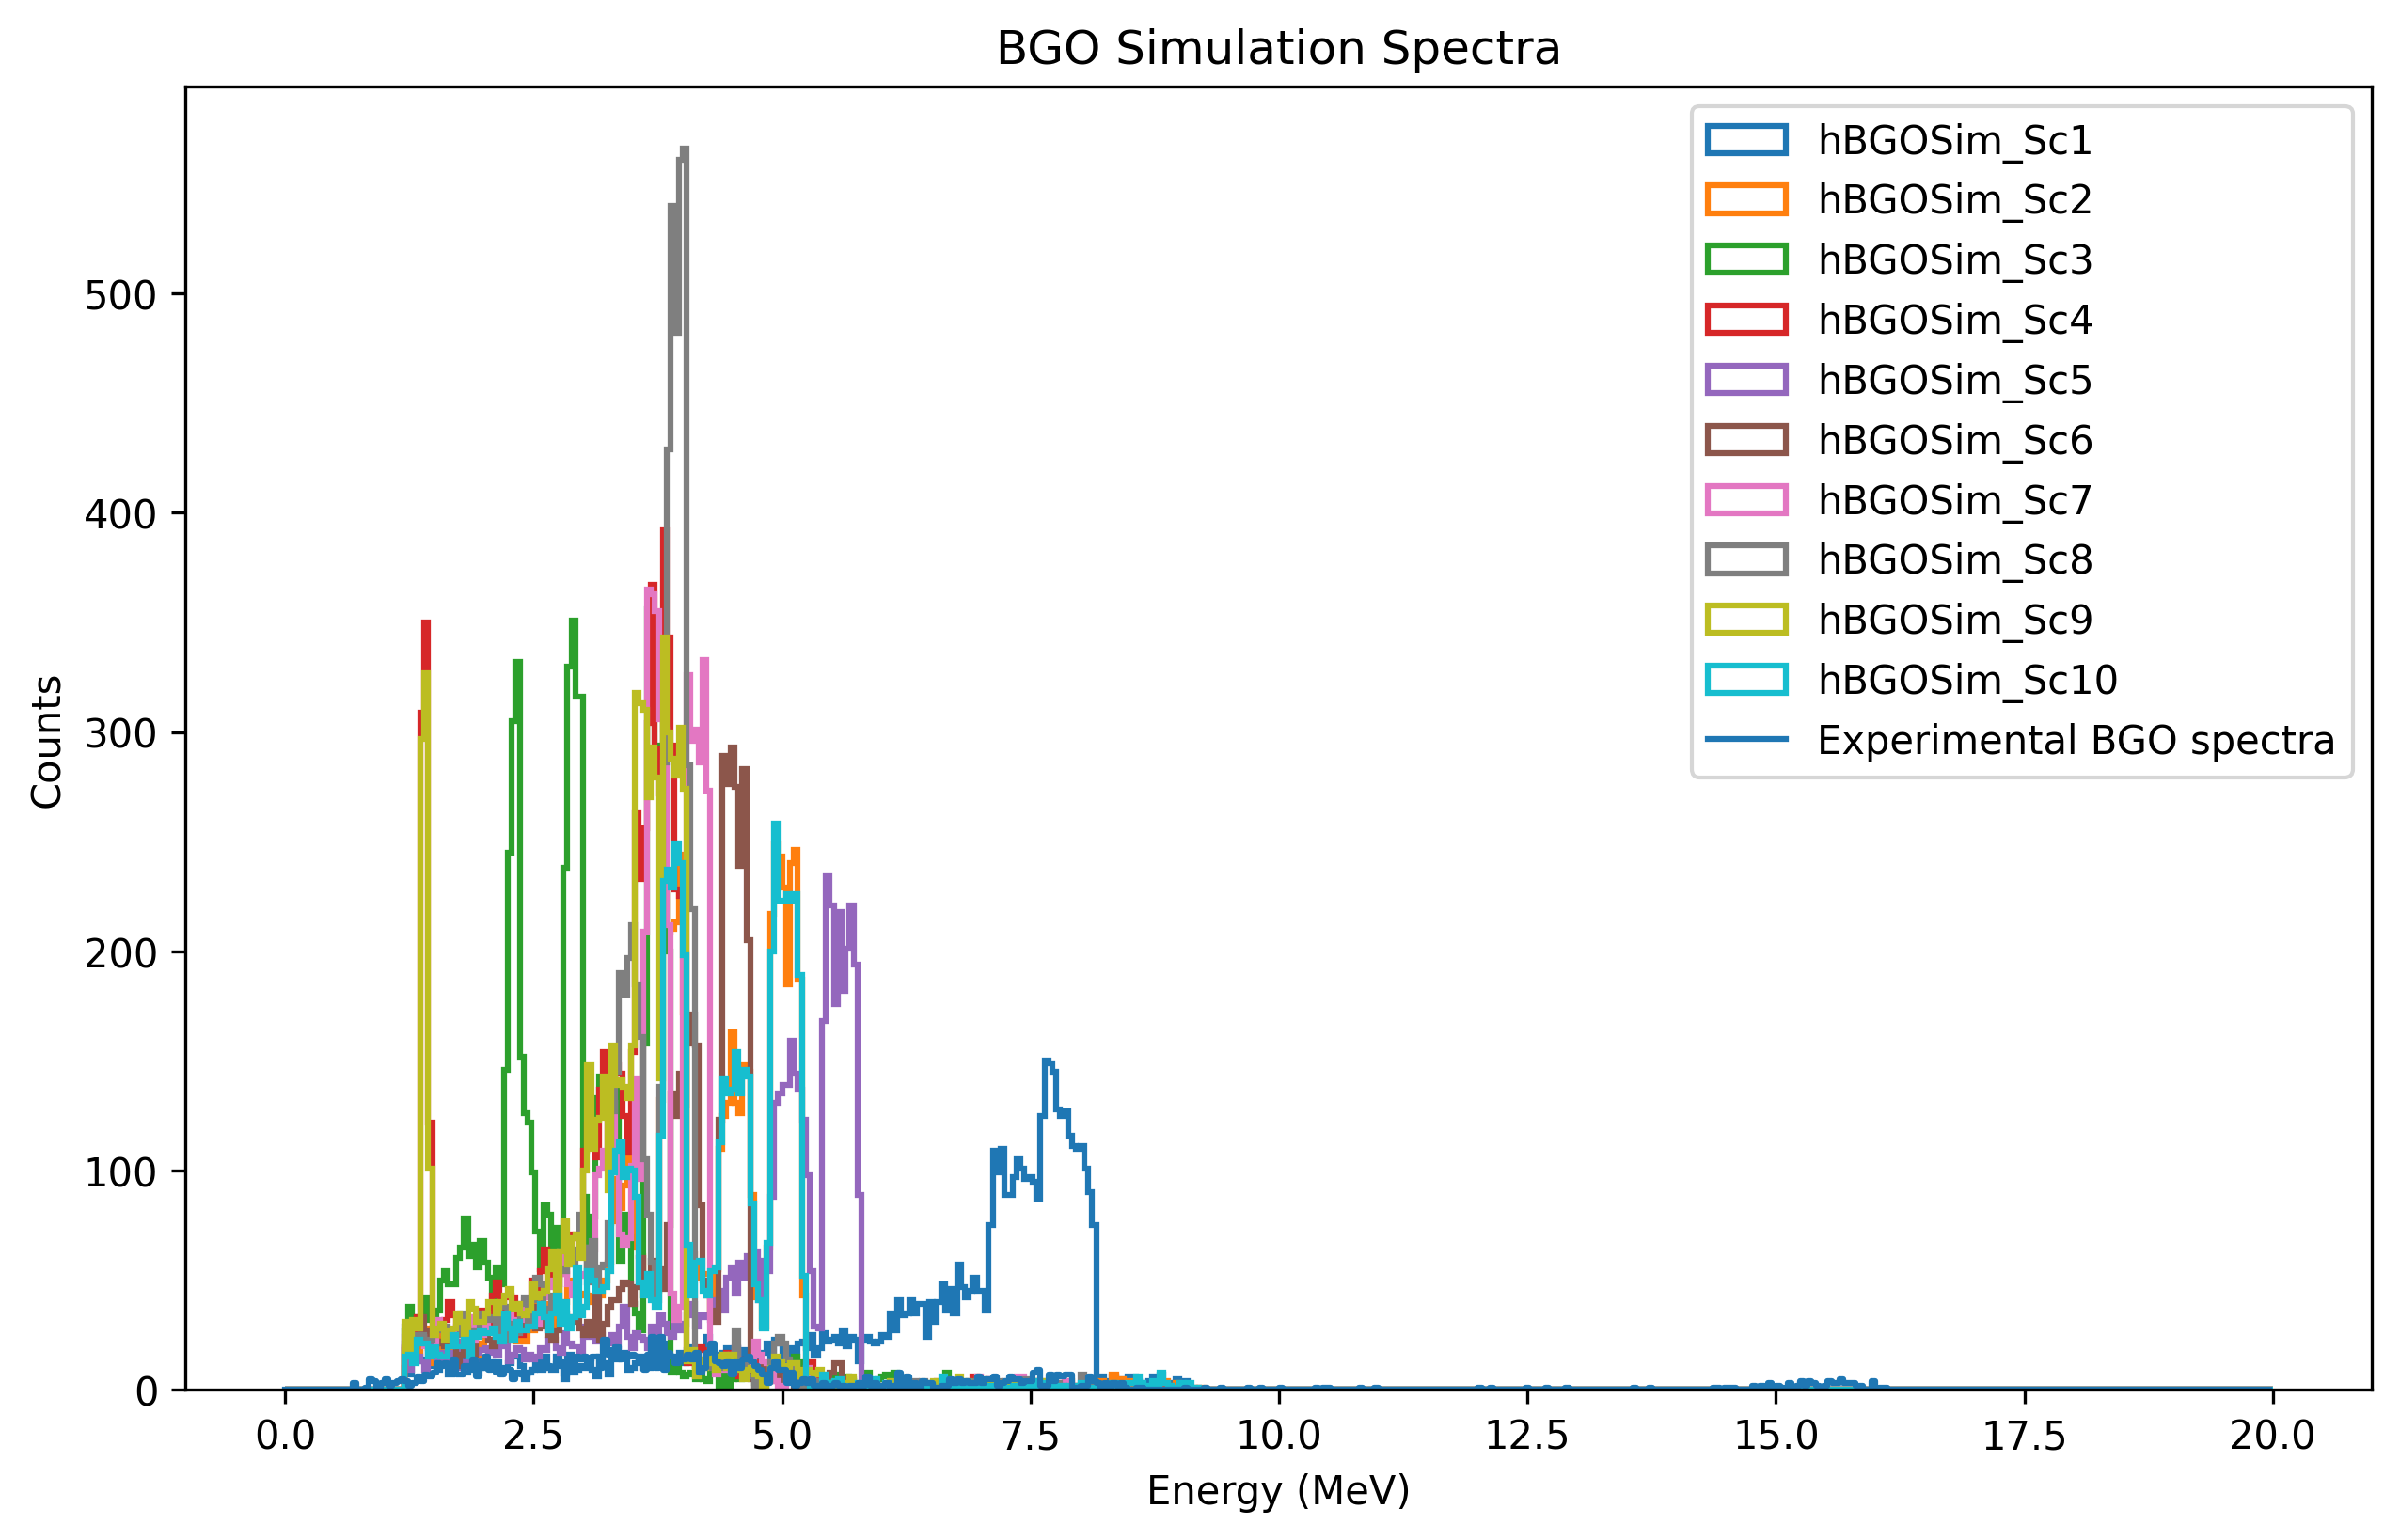

In [14]:
root_file = ROOT.TFile.Open("hBgoSpectra.root")

hist_names = [
    "hBGOSim_Sc1", "hBGOSim_Sc2", "hBGOSim_Sc3", "hBGOSim_Sc4", 
    "hBGOSim_Sc5", "hBGOSim_Sc6", "hBGOSim_Sc7", "hBGOSim_Sc8", 
    "hBGOSim_Sc9", "hBGOSim_Sc10"
]

# Create a figure
plt.figure(figsize=(10, 6),dpi=300)

# Loop through histograms and extract data for plotting
for hist_name in hist_names:
    hist = root_file.Get(hist_name)
    
    # Extract bin edges and values
    bin_edges = []
    bin_values = []
    for i in range(1, hist.GetNbinsX() + 1):
        bin_edges.append(hist.GetBinLowEdge(i))
        bin_values.append(hist.GetBinContent(i))
    bin_edges.append(hist.GetBinLowEdge(hist.GetNbinsX() + 1))  # Last bin upper edge
    
    # Convert to numpy arrays
    bin_edges = np.array(bin_edges)
    bin_values = np.array(bin_values)
    
    # Plot the histogram
    plt.hist(bin_edges[:-1], bins=bin_edges, weights=bin_values, 
             histtype='step', label=hist_name, linewidth=1.5)


n_bins = hBgo_hist.GetNbinsX()
x_edges = np.array([hBgo_hist.GetBinLowEdge(i) for i in range(1, n_bins + 2)])
y_values = np.array([hBgo_hist.GetBinContent(i) for i in range(1, n_bins + 1)])



plt.step(x_edges[:-1], y_values,label="Experimental BGO spectra")
# Add labels and title
plt.xlabel('Energy (MeV)')  # Replace with the correct axis label
plt.ylabel('Counts')
plt.title('BGO Simulation Spectra')
plt.legend()
#plt.grid(True)
plt.show()